In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import torch as t
from gninvert.gns import MultiDiffusionGN
from gninvert.gnns import GNN_3Layer
from gninvert.hyperparamsearch import hpsearch
from gninvert.graph_compare import model_steps_compare, model_compare
import gninvert.data_generation as data_generation
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (hyperparamsearch.py, line 70)

In [4]:
callable(lambda x : x)

True

In [8]:
type((1,2,3)) is not list

True

In [73]:
diffusionGN = MultiDiffusionGN([0.1, 0.1])

ERROR! Session/line number was not unique in database. History logging moved to new session 129


In [74]:
device = t.device('cuda' if t.cuda.is_available() else 'cpu')

In [77]:
params = {
    'starting_lr': [0.1, 0.05, 0.01],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [20, 100],
    'lr_scheduler_cooldown': [20],
    'batch_size': [1],
    'adam_weight_decay': [5e-7],
    'epochs': [500],
    'loss_func': [t.nn.MSELoss()],
    'regularization_coefficient': [1e-5, 1e-4, 1e-3, 1e-2],
    'regularization_norm': [0.5, 1]
}

In [78]:
results = hpsearch(
    params,
    model_constructor = lambda : GNN_3Layer(node_features=2, message_features=2, hidden_size=10).to(device),
    model_score_fn = lambda model : model_steps_compare(model, diffusionGN)['absolute']['avg_difs'][-1],
    training_data = data_generation.get_TrainingData(diffusionGN, graphs_per_edge_index = 10)
)

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

Purpose: redo 3-layer GN results ($10^{-4}$) with new training code

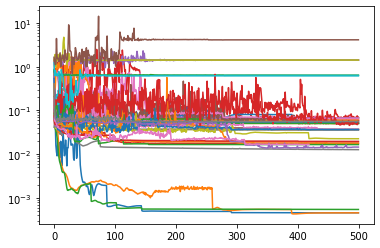

In [79]:
plots = [res['val_loss_history'] for res in results]
for p in plots:
    plt.plot(p)
plt.yscale('log')

In [81]:
results[0]['settings']

{'starting_lr': 0.05,
 'lr_scheduler_dec_factor': 0.2,
 'lr_scheduler_patience': 20,
 'lr_scheduler_cooldown': 20,
 'batch_size': 1,
 'adam_weight_decay': 5e-07,
 'epochs': 500,
 'loss_func': MSELoss(),
 'regularization_coefficient': 1e-05,
 'regularization_norm': 1}

In [87]:
for i in range(3):
    t.save(results[i]['model'], f'models/sim2-gnn3-0{i}.pt')
    t.save(results[i]['settings'], f'models/sim2-gnn3-0{i}-settings')

In [89]:
for i in range(3):
    results[i]['settings']

{'starting_lr': 0.05, 'lr_scheduler_dec_factor': 0.2, 'lr_scheduler_patience': 20, 'lr_scheduler_cooldown': 20, 'batch_size': 1, 'adam_weight_decay': 5e-07, 'epochs': 500, 'loss_func': MSELoss(), 'regularization_coefficient': 1e-05, 'regularization_norm': 1}
{'starting_lr': 0.01, 'lr_scheduler_dec_factor': 0.2, 'lr_scheduler_patience': 100, 'lr_scheduler_cooldown': 20, 'batch_size': 1, 'adam_weight_decay': 5e-07, 'epochs': 500, 'loss_func': MSELoss(), 'regularization_coefficient': 1e-05, 'regularization_norm': 1}
{'starting_lr': 0.01, 'lr_scheduler_dec_factor': 0.2, 'lr_scheduler_patience': 20, 'lr_scheduler_cooldown': 20, 'batch_size': 1, 'adam_weight_decay': 5e-07, 'epochs': 500, 'loss_func': MSELoss(), 'regularization_coefficient': 1e-05, 'regularization_norm': 1}


In [92]:
params2 = {
    'starting_lr': [0.05],
    'lr_scheduler_dec_factor': [0.2],
    'lr_scheduler_patience': [40],
    'lr_scheduler_cooldown': [20],
    'batch_size': [1],
    'adam_weight_decay': [5e-7, 5e-5, 5e-3],
    'epochs': [300],
    'loss_func': [t.nn.MSELoss(), t.nn.L1Loss()],
    'regularization_coefficient': [1e-5],
    'regularization_norm': [1, 2]
}

In [93]:
results2 = hpsearch(
    params,
    model_constructor = lambda : GNN_3Layer(node_features=2, message_features=2, hidden_size=6, final_gelu = False).to(device),
    model_score_fn = lambda model : model_steps_compare(model, diffusionGN)['absolute']['avg_difs'][-1],
    training_data = data_generation.get_TrainingData(diffusionGN, graphs_per_edge_index = 10)
)

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

Purpose: explore loss_func, Adam weight, and 2-norm effects

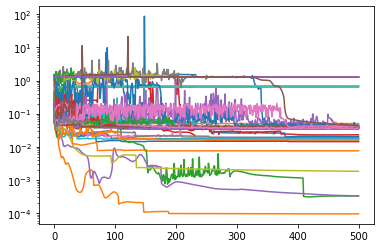

In [94]:
plots = [res['val_loss_history'] for res in results2]
for p in plots:
    plt.plot(p)
plt.yscale('log')

In [96]:
[results2[i]['val_loss_history'][-1] for i in range(10)]

[0.014759103767573833,
 9.52672417042777e-05,
 0.00033168061054311693,
 0.014356664381921291,
 0.00033146582427434623,
 0.01759888045489788,
 0.017562154680490494,
 0.019264783710241318,
 0.001832052250392735,
 0.01724741794168949]

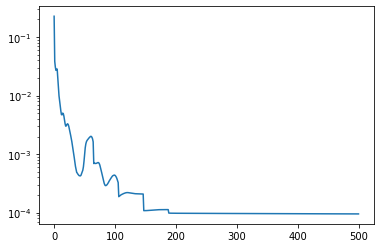

In [104]:
plt.plot(results2[1]['val_loss_history'])
plt.yscale('log')

In [108]:
t.save(results2[1]['model'], 'models/sim2-gnn3ng-02.pt')
t.save(results2[1]['settings'], 'models/sim2-gnn3ng-02-settings')

Stats for 20 steps for node features:
Greatest relative difference: 17461434.375%
Average relative difference: 301483.37510704994%
Smallest relative difference: 100.05497932434082%
Greatest absolute difference: 0.05642871558666229
Average absolute difference: 0.0210420535877347
Smallest absolute difference: 8.380413055419922e-05%


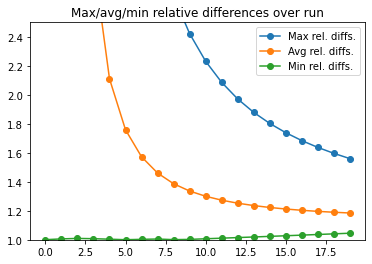

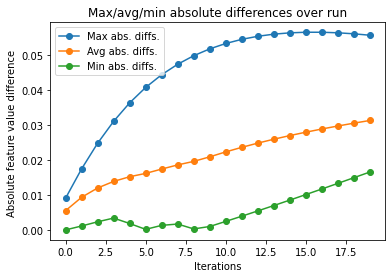

The model being tested finished the run outputting this graph:


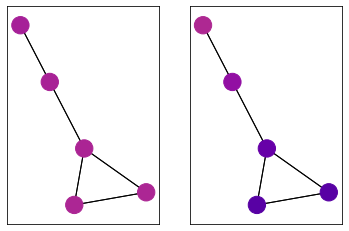

tensor([[0.3844, 0.1548],
        [0.3851, 0.1548],
        [0.3813, 0.1928],
        [0.3738, 0.3061],
        [0.3648, 0.3939]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


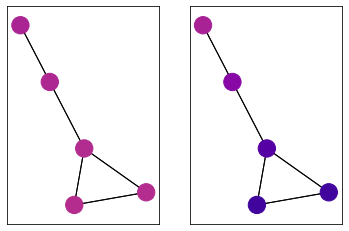

tensor([[0.4091, 0.0992],
        [0.4097, 0.0992],
        [0.4058, 0.1503],
        [0.3940, 0.2798],
        [0.3814, 0.3715]])


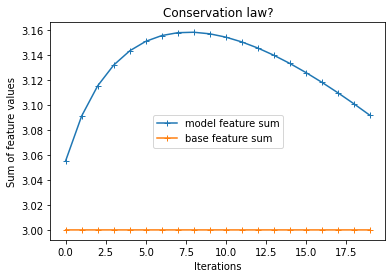

(Data(x=[5, 2], edge_index=[2, 10]), Data(x=[5, 2], edge_index=[2, 10]))

In [107]:
model_compare(results2[1]['model'], diffusionGN)